# 🫀 Heart Disease Prediction Project


------------
## 📌 Objective

The goal of this project is to predict whether a patient has heart disease 
based on clinical and demographic features.


----------
## 🧾 Dataset Overview

- Each row represents **one patient**.
- The dataset contains medical measurements and demographic attributes.
- The target variable is **HeartDisease**.
- This is a **Binary Classification** problem.

-----------
## 🧑‍⚕️ Patient Information

- **Age** → Age of the patient (in years).
- **Sex** → Gender of the patient (M = Male, F = Female).

-------------
## 💓 Clinical Features

- **ChestPainType** → Type of chest pain:
  - TA  → Typical Angina
  - ATA → Atypical Angina
  - NAP → Non-Anginal Pain
  - ASY → Asymptomatic

- **RestingBP** → Resting blood pressure (mm Hg).
- **Cholesterol** → Serum cholesterol (mg/dL).
- **FastingBS** → Fasting blood sugar:
  - 1 → if fasting blood sugar > 120 mg/dL
  - 0 → otherwise

- **RestingECG** → Resting electrocardiogram results:
  - Normal
  - ST
  - LVH

- **MaxHR** → Maximum heart rate achieved.
- **ExerciseAngina** → Exercise-induced angina (Y = Yes, N = No).
- **Oldpeak** → ST depression induced by exercise relative to rest.
- **ST_Slope** → Slope of the peak exercise ST segment:
  - Up
  - Flat
  - Down

---------
## 🎯 Target Variable

- **HeartDisease**
  - 0 → No Heart Disease
  - 1 → Heart Disease Present

------------
## 🚀 Modeling Goal

Build a machine learning model that:
- Learns patterns from clinical indicators.
- Predicts heart disease risk.
- Assists in early medical diagnosis.

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

--------
Data OverView
-----

In [149]:
df = pd.read_csv(r"D:\00jupters-notebook\Task_Nti\Data\heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [150]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

| العمود             | معناه                  | نوعه   | شرح بسيط                          |
| ------------------ | ---------------------- | ------ | --------------------------------- |
| **Age**            | العمر                  | رقمي   | سن المريض بالسنين                 |
| **Sex**            | الجنس                  | تصنيفي | M = ذكر ، F = أنثى                |
| **ChestPainType**  | نوع ألم الصدر          | تصنيفي | نوع الألم اللي المريض حاسس بيه    |
| **RestingBP**      | ضغط الدم أثناء الراحة  | رقمي   | ضغط الدم (mm Hg)                  |
| **Cholesterol**    | الكوليسترول            | رقمي   | مستوى الكوليسترول في الدم (mg/dl) |
| **FastingBS**      | سكر صائم               | ثنائي  | 1 لو السكر > 120 mg/dl، غير كده 0 |
| **RestingECG**     | رسم القلب أثناء الراحة | تصنيفي | نتيجة ECG                         |
| **MaxHR**          | أعلى معدل نبض          | رقمي   | أعلى نبض وصل له أثناء المجهود     |
| **ExerciseAngina** | ألم مع المجهود         | ثنائي  | Y = نعم ، N = لا                  |
| **Oldpeak**        | انخفاض ST              | رقمي   | فرق ST بسبب المجهود               |
| **ST_Slope**       | ميل ST                 | تصنيفي | شكل منحنى ST                      |
| **HeartDisease**   | مرض القلب              | Target | 1 = مريض، 0 = سليم                |


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [152]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


-------
Data Cleaning
------

* 🔍 Check Missing Values Count


In [153]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

* 🔍 Check Number of Duplicate Rows

In [154]:
df.duplicated().sum()

np.int64(0)

In [155]:
df.columns


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

---
Data Encoding
-

* 🔍 Show Unique Values for Categorical Columns

In [156]:
for col in df.select_dtypes(include='object'):
    print(col,df[col].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


In [157]:
import pickle as pk

In [158]:
import warnings
warnings.filterwarnings('ignore')

* 🔍 Label Encoding

In [159]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lbl = {}
for col in df.select_dtypes(include='object'):
    df[col] = lb.fit_transform(df[[col]])
    lbl[col] = lb

pk.dump(lbl,open('Encoding.pkl','wb'))

## 🎯 Target Distribution
This plot shows the number of patients with and without heart disease.
It helps to check if the dataset is balanced or imbalanced.

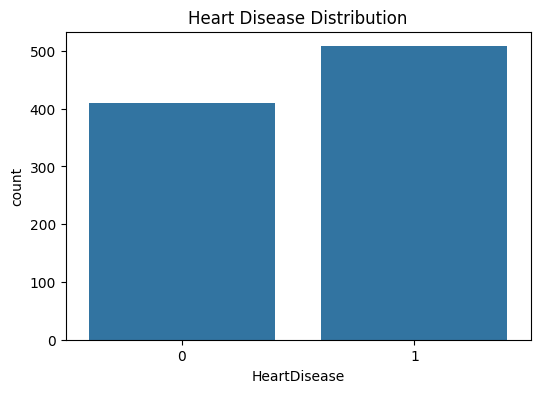

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='HeartDisease', data=df)
plt.title("Heart Disease Distribution")
plt.show()

## 👨‍⚕️ Age Distribution vs Heart Disease
This plot shows how age is distributed among patients with and without heart disease.
It helps identify if older patients are at higher risk.

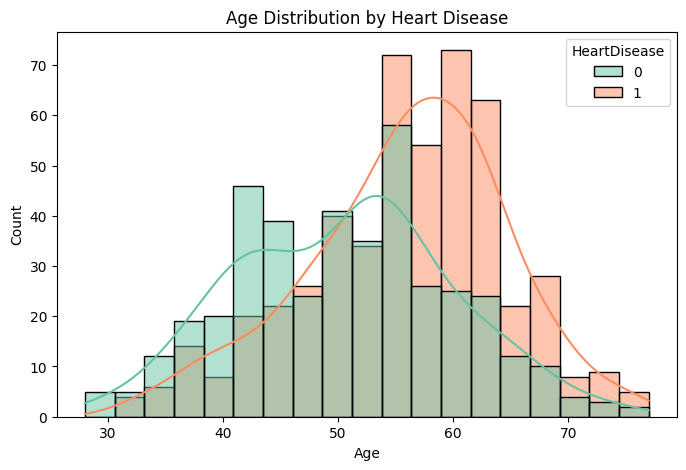

In [161]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True, palette='Set2')
plt.title("Age Distribution by Heart Disease")
plt.show()

## 🫀 Chest Pain Type vs Heart Disease
This plot shows the relation between chest pain type and heart disease.
It helps identify which type of chest pain is most associated with heart disease.

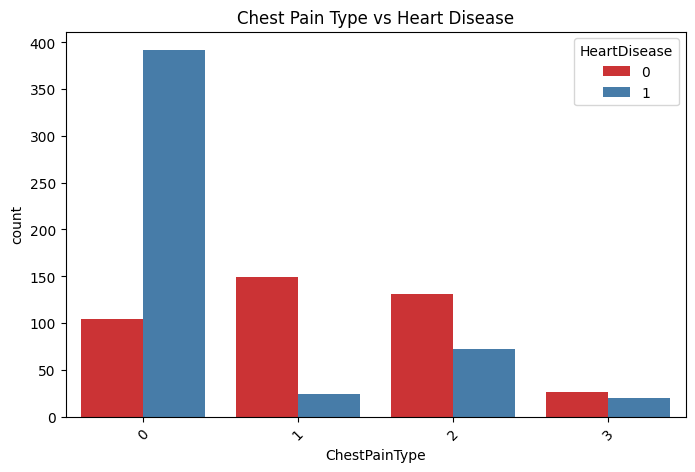

In [162]:
plt.figure(figsize=(8,5))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, palette='Set1')
plt.title("Chest Pain Type vs Heart Disease")
plt.xticks(rotation=45)
plt.show()

## ❤️ Max Heart Rate vs Heart Disease
This boxplot shows how maximum heart rate differs for patients with and without heart disease.
It helps understand the relation between exercise capacity and disease presence.

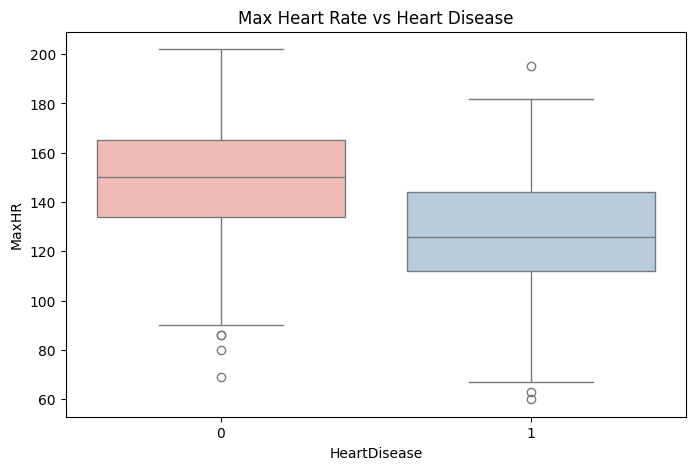

In [163]:
plt.figure(figsize=(8,5))
sns.boxplot(x='HeartDisease', y='MaxHR', data=df, palette='Pastel1')
plt.title("Max Heart Rate vs Heart Disease")
plt.show()

## 📉 Correlation Heatmap
This heatmap shows correlation between all numeric features.
It helps identify which features are highly correlated with heart disease.

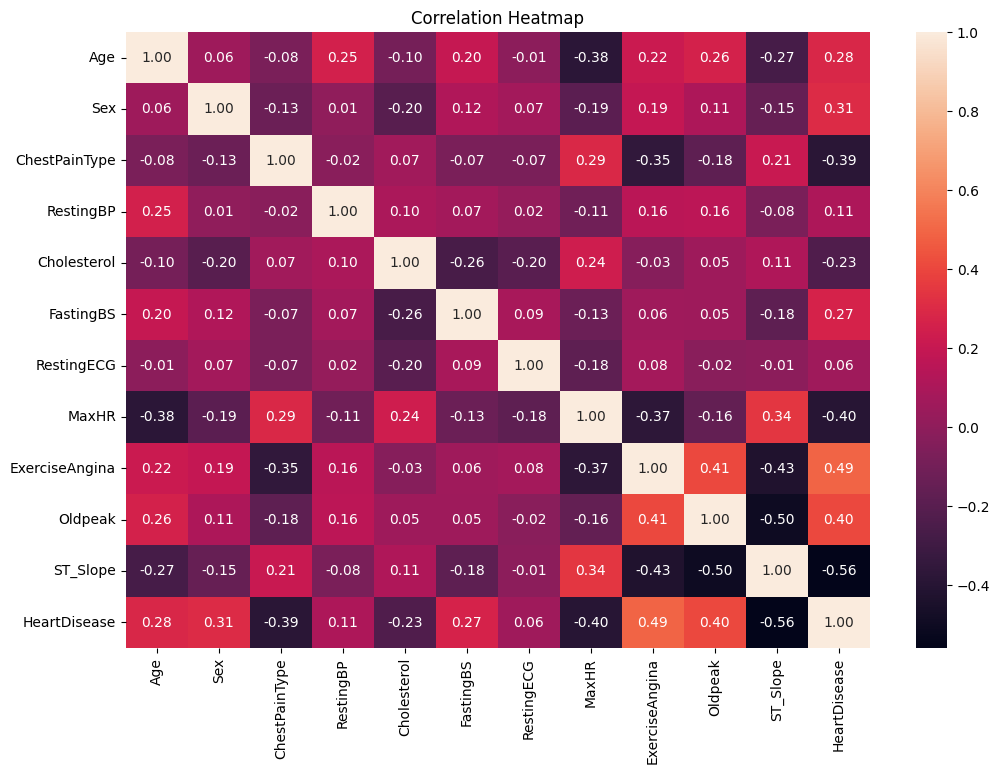

In [164]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True,  fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## ⚡ Data Splitting

We split the dataset into **features (X)** and **target (y)**,  
and then into **training** and **testing** sets.  

- Test size: 20%  
- Random state: 42 (for reproducibility)  
- Stratify: ensures the target distribution is preserved in train and test sets

In [165]:
x = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [166]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42,shuffle=True)

In [167]:
x_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
557,56,1,2,137,208,1,2,122,1,1.8,1
260,46,1,1,140,275,0,1,165,1,0.0,2
235,39,1,1,120,200,0,1,160,1,1.0,1
218,55,1,1,140,196,0,1,150,0,0.0,2
382,43,1,0,115,0,0,1,145,1,2.0,1


## 📊 Feature Distribution & Scaling Decision

Before applying scaling, we visualize numeric features using **Boxplots**  
to detect outliers and understand feature distributions.  

- Features with large differences in scale may require **StandardScaler** or **RobustScaler**.  
- Outliers may influence the choice of scaler.

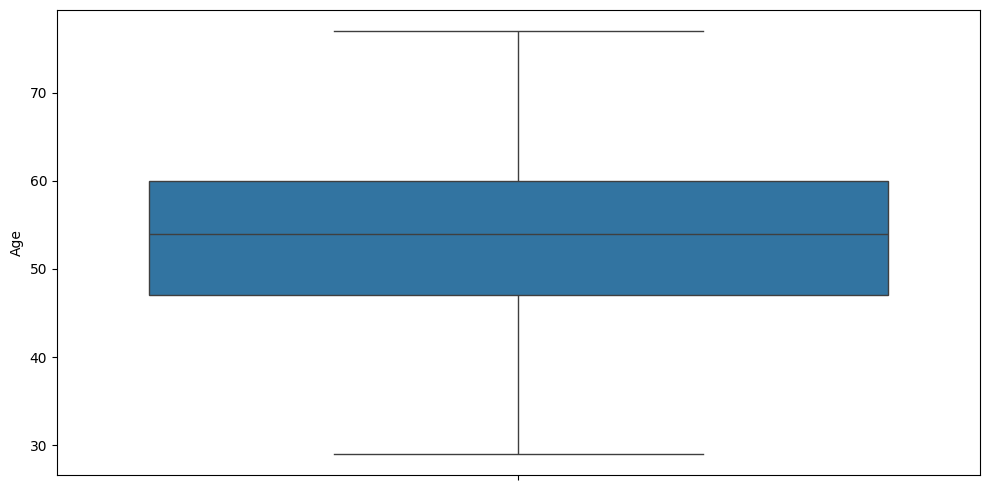

In [168]:
plt.figure(figsize=(10,5))
sns.boxplot(x_train['Age'])
plt.tight_layout()
plt.show()

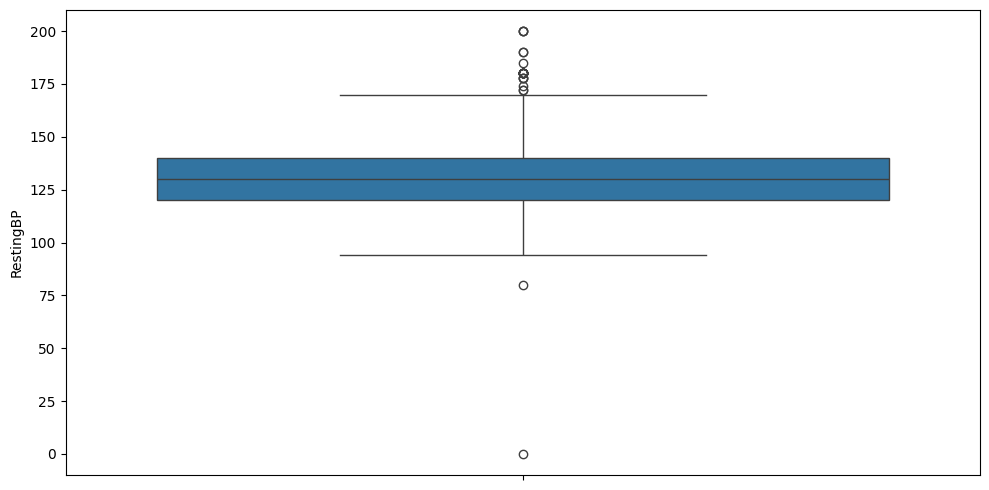

In [169]:
plt.figure(figsize=(10,5))
sns.boxplot(x_train['RestingBP'])
plt.tight_layout()
plt.show()

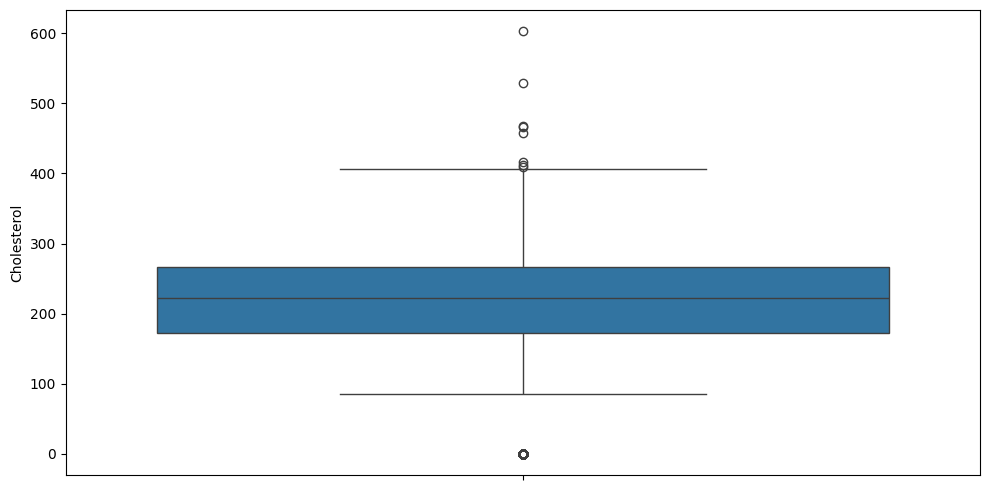

In [170]:
plt.figure(figsize=(10,5))
sns.boxplot(x_train['Cholesterol'])
plt.tight_layout()
plt.show()

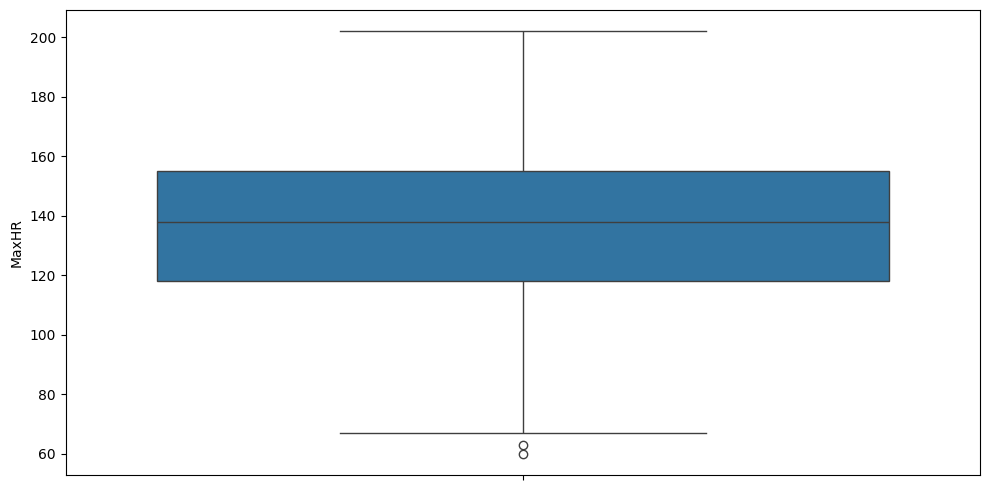

In [171]:
plt.figure(figsize=(10,5))
sns.boxplot(x_train['MaxHR'])
plt.tight_layout()
plt.show()

## ⚡ Feature Scaling

After inspecting numeric feature distributions via Boxplots, we apply scaling to normalize the data.

- **StandardScaler** → centers features to mean=0 and std=1. Useful for most features without extreme outliers.  
- **RobustScaler** → uses median and IQR, less sensitive to outliers. Ideal for features with outliers.  

Scaling is applied **only to training data** and then used to transform the test data to avoid data leakage.

In [172]:
from sklearn.preprocessing import RobustScaler ,StandardScaler
scaler1 = RobustScaler()
sc = {}
scaler2 = StandardScaler()
for col in ['RestingBP','Cholesterol','MaxHR']:
    x_train[col] = scaler1.fit_transform(x_train[[col]])
    x_test[col] = scaler1.transform(x_test[[col]])
    sc[col] = scaler1

x_train['Age'] = scaler2.fit_transform(x_train[['Age']])
x_test['Age'] = scaler2.transform(x_test[['Age']])

pk.dump(sc,open('Robust.pkl','wb'))
pk.dump(scaler2,open('Stander.pkl','wb'))

In [173]:
x_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
557,0.269421,1,2,0.35,-0.149333,1,2,-0.435374,1,1.8,1
260,-0.798951,1,1,0.50,0.565333,0,1,0.734694,1,0.0,2
235,-1.546811,1,1,-0.50,-0.234667,0,1,0.598639,1,1.0,1
218,0.162584,1,1,0.50,-0.277333,0,1,0.326531,0,0.0,2
382,-1.119462,1,0,-0.75,-2.368000,0,1,0.190476,1,2.0,1


## 🔹 Logistic Regression Model

In [174]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [175]:
y_pred1 = model1.predict(x_test)

In [176]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        38
           1       0.89      0.87      0.88        54

    accuracy                           0.86        92
   macro avg       0.85      0.86      0.85        92
weighted avg       0.86      0.86      0.86        92



## 🔹 K-Nearest Neighbors (KNN)

In [177]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=1)
model2.fit(x_train,y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",1
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [178]:
y_pred2 = model2.predict(x_test)

In [179]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84        38
           1       0.90      0.85      0.88        54

    accuracy                           0.86        92
   macro avg       0.85      0.86      0.86        92
weighted avg       0.86      0.86      0.86        92



## 🔹 SVM

In [180]:
from sklearn.svm import SVC
model3 = SVC(kernel='linear',C=100,gamma=1)
model3.fit(x_train,y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",100
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",1
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [181]:
y_pred3 = model3.predict(x_test)

In [182]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        38
           1       0.87      0.85      0.86        54

    accuracy                           0.84        92
   macro avg       0.83      0.83      0.83        92
weighted avg       0.84      0.84      0.84        92



## 🔹 Desion Tree


In [183]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',max_depth=10)
model4.fit(x_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'entropy'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curr

In [184]:
y_pred4 = model4.predict(x_test)

In [185]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        38
           1       0.85      0.85      0.85        54

    accuracy                           0.83        92
   macro avg       0.82      0.82      0.82        92
weighted avg       0.83      0.83      0.83        92



## 🔹 Random Forest


In [186]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=10)
model5.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",50
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'entropy'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [187]:
y_pred5 = model5.predict(x_test)

In [188]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        38
           1       0.88      0.93      0.90        54

    accuracy                           0.88        92
   macro avg       0.88      0.87      0.88        92
weighted avg       0.88      0.88      0.88        92




## 🔹 Bagging


In [189]:
from sklearn.ensemble import BaggingClassifier
model6 = BaggingClassifier(estimator=RandomForestClassifier(),n_estimators=50,random_state=42)
model6.fit(x_train,y_train)

,"estimator estimator: object, default=NoneThe base estimator to fit on random subsets of the dataset.If None, then the base estimator is a:class:`~sklearn.tree.DecisionTreeClassifier`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",RandomForestClassifier()
,"n_estimators n_estimators: int, default=10The number of base estimators in the ensemble.",50
,"max_samples max_samples: int or float, default=NoneThe number of samples to draw from X to train each base estimator (withreplacement by default, see `bootstrap` for more details).- If None, then draw `X.shape[0]` samples irrespective of `sample_weight`.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` unweighted samples or `max_samples * sample_weight.sum()` weighted samples.",None
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator (without replacement by default, see `bootstrap_features` for moredetails).- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.",1.0
,"bootstrap bootstrap: bool, default=TrueWhether samples are drawn with replacement. If False, sampling withoutreplacement is performed. If fitting with `sample_weight`, it isstrongly recommended to choose True, as only drawing with replacementwill ensure the expected frequency semantics of `sample_weight`.",True
,"bootstrap_features bootstrap_features: bool, default=FalseWhether features are drawn with replacement.",False
,"oob_score oob_score: bool, default=FalseWhether to use out-of-bag samples to estimatethe generalization error. Only available if bootstrap=True.",False
,"warm_start warm_start: bool, default=FalseWhen set to True, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fita whole new ensemble. See :term:`the Glossary `... versionadded:: 0.17 *warm_start* constructor parameter.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for both :meth:`fit` and:meth:`predict`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random resampling of the original dataset(sample wise and feature wise).If the base estimator accepts a `random_state` attribute, a differentseed is generated for each instance in the ensemble.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity when fitting and predicting.",0


In [190]:
y_pred6 = model6.predict(x_test)

In [191]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        38
           1       0.89      0.93      0.91        54

    accuracy                           0.89        92
   macro avg       0.89      0.88      0.89        92
weighted avg       0.89      0.89      0.89        92




## 🔹 ADaboost


In [192]:
from sklearn.ensemble import AdaBoostClassifier
model7 = AdaBoostClassifier(n_estimators=50,random_state=42)
model7.fit(x_train,y_train)

,"estimator estimator: object, default=NoneThe base estimator from which the boosted ensemble is built.Support for sample weighting is required, as well as proper``classes_`` and ``n_classes_`` attributes. If ``None``, thenthe base estimator is :class:`~sklearn.tree.DecisionTreeClassifier`initialized with `max_depth=1`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",None
,"n_estimators n_estimators: int, default=50The maximum number of estimators at which boosting is terminated.In case of perfect fit, the learning procedure is stopped early.Values must be in the range `[1, inf)`.",50
,"learning_rate learning_rate: float, default=1.0Weight applied to each classifier at each boosting iteration. A higherlearning rate increases the contribution of each classifier. There isa trade-off between the `learning_rate` and `n_estimators` parameters.Values must be in the range `(0.0, inf)`.",1.0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given at each `estimator` at eachboosting iteration.Thus, it is only used when `estimator` exposes a `random_state`.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42


In [193]:
y_pred7 = model7.predict(x_test)

In [194]:
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        38
           1       0.89      0.87      0.88        54

    accuracy                           0.86        92
   macro avg       0.85      0.86      0.85        92
weighted avg       0.86      0.86      0.86        92




## 🔹 Gradien


In [195]:
from sklearn.ensemble import GradientBoostingClassifier
model8 = GradientBoostingClassifier(n_estimators=50,learning_rate=0.1,random_state=42)
model8.fit(x_train,y_train)

,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",50
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, `

In [196]:
y_pred8 = model8.predict(x_test)

In [197]:
print(classification_report(y_test,y_pred8))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        38
           1       0.89      0.93      0.91        54

    accuracy                           0.89        92
   macro avg       0.89      0.88      0.89        92
weighted avg       0.89      0.89      0.89        92




## 🔹 HistGradientBoosting


In [198]:
from sklearn.ensemble import HistGradientBoostingClassifier
model9 = HistGradientBoostingClassifier(max_iter=100,learning_rate=0.1,random_state=42)
model9.fit(x_train,y_train)

,"loss loss: {'log_loss'}, default='log_loss'The loss function to use in the boosting process.For binary classification problems, 'log_loss' is also known as logistic loss,binomial deviance or binary crossentropy. Internally, the model fits one treeper boosting iteration and uses the logistic sigmoid function (expit) asinverse link function to compute the predicted positive class probability.For multiclass classification problems, 'log_loss' is also known as multinomialdeviance or categorical crossentropy. Internally, the model fits one tree perboosting iteration and per class and uses the softmax function as inverse linkfunction to compute the predicted probabilities of the classes.",'log_loss'
,"learning_rate learning_rate: float, default=0.1The learning rate, also known as *shrinkage*. This is used as amultiplicative factor for the leaves values. Use ``1`` for noshrinkage.",0.1
,"max_iter max_iter: int, default=100The maximum number of iterations of the boosting process, i.e. themaximum number of trees for binary classification. For multiclassclassification, `n_classes` trees per iteration are built.",100
,"max_leaf_nodes max_leaf_nodes: int or None, default=31The maximum number of leaves for each tree. Must be strictly greaterthan 1. If None, there is no maximum limit.",31
,"max_depth max_depth: int or None, default=NoneThe maximum depth of each tree. The depth of a tree is the number ofedges to go from the root to the deepest leaf.Depth isn't constrained by default.",None
,"min_samples_leaf min_samples_leaf: int, default=20The minimum number of samples per leaf. For small datasets with lessthan a few hundred samples, it is recommended to lower this valuesince only very shallow trees would be built.",20
,"l2_regularization l2_regularization: float, default=0The L2 regularization parameter penalizing leaves with small hessians.Use ``0`` for no regularization (default).",0.0
,"max_features max_features: float, default=1.0Proportion of randomly chosen features in each and every node split.This is a form of regularization, smaller values make the trees weakerlearners and might prevent overfitting.If interaction constraints from `interaction_cst` are present, only allowedfeatures are taken into account for the subsampling... versionadded:: 1.4",1.0
,"max_bins max_bins: int, default=255The maximum number of bins to use for non-missing values. Beforetraining, each feature of the input array `X` is binned intointeger-valued bins, which allows for a much faster training stage.Features with a small number of unique values may use less than``max_bins`` bins. In addition to the ``max_bins`` bins, one more binis always reserved for missing values. Must be no larger than 255.",255
,"categorical_features categorical_features: array-like of {bool, int, str} of shape (n_features) or shape (n_categorical_features,), default='from_dtype'Indicates the categorical features.- None : no feature will be considered categorical.- boolean array-like : boolean mask indicating categorical features.- integer array-like : integer indices indicating categorical features.- str array-like: names of categorical features (assuming the training data has feature names).- `""from_dtype""`: dataframe columns with dtype ""category"" are considered to be categorical features. The input must be an object exposing a ``__dataframe__`` method such as pandas or polars DataFrames to use this feature.For each categorical feature, there must be at most `max_bins` uniquecategories. Negative values for categorical features encoded as numericdtypes are treated as missing values. All categorical values areconverted to floating point numbers. This means that categorical valuesof 1.0 and 1 are treated as the same category.Read more in the :ref:`User Guide `... versionadded:: 0.24.. versionchanged:: 1.2 Added support for feature names... versionchanged:: 1.4 Added `""from_dtype""` option... versionchanged:: 1.6 The default value changed from `None` to `""from_dtype""`.",'from_dt

In [199]:
y_pred9 = model9.predict(x_test)

In [200]:
print(classification_report(y_test,y_pred9))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        38
           1       0.89      0.89      0.89        54

    accuracy                           0.87        92
   macro avg       0.87      0.87      0.87        92
weighted avg       0.87      0.87      0.87        92



## 🔹  XGBoost

In [201]:
from xgboost import XGBRFClassifier
model10 = XGBRFClassifier()
model10.fit(x_train,y_train)

,"learning_rate learning_rate: typing.Optional[float]Boosting learning rate (xgb's ""eta"")",1.0
,subsample subsample: typing.Optional[float]Subsample ratio of the training instance.,0.8
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,0.8
,reg_lambda reg_lambda: typing.Optional[float]L2 regularization term on weights (xgb's lambda).,1e-05
,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None


In [202]:
y_pred10 = model10.predict(x_test)

In [203]:
print(classification_report(y_test,y_pred10))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        38
           1       0.89      0.93      0.91        54

    accuracy                           0.89        92
   macro avg       0.89      0.88      0.89        92
weighted avg       0.89      0.89      0.89        92




## 🔹 Lightgbm


In [204]:
from lightgbm import LGBMClassifier
model11 = LGBMClassifier(n_estimators=50,learning_rate=0.1,random_state=42)
model11.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 454, number of negative: 372
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 378
[LightGBM] [Info] Number of data points in the train set: 826, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549637 -> initscore=0.199203
[LightGBM] [Info] Start training from score 0.199203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,50
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [205]:
y_pred11 = model11.predict(x_test)

In [206]:
print(classification_report(y_test,y_pred11))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        38
           1       0.89      0.89      0.89        54

    accuracy                           0.87        92
   macro avg       0.87      0.87      0.87        92
weighted avg       0.87      0.87      0.87        92



In [207]:
pk.dump(model11,open('model11.pkl','wb'))


## 🔹 CatBoost


In [208]:
from catboost import CatBoostClassifier
model12 = CatBoostClassifier(verbose=0,iterations=100,random_state=42,learning_rate=0.1)
model12.fit(x_train,y_train)

In [209]:
y_pred12 = model12.predict(x_test)

In [210]:
print(classification_report(y_test,y_pred12))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        38
           1       0.89      0.93      0.91        54

    accuracy                           0.89        92
   macro avg       0.89      0.88      0.89        92
weighted avg       0.89      0.89      0.89        92



-----
All Models
-----

In [211]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [212]:

models = {

    # Linear
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=1),

    # Distance-based
    "KNN": KNeighborsClassifier(n_neighbors=5),

    # SVM
    "SVC": SVC(probability=True, random_state=1),

    # Tree
    "Decision Tree": DecisionTreeClassifier(random_state=1),

    # Naive Bayes 
    "Naive Bayes": GaussianNB(),

    # Bagging Based
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=1),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=1),

    # Boosting
    "AdaBoost": AdaBoostClassifier(random_state=1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=1),
    "Hist Gradient Boosting": HistGradientBoostingClassifier(random_state=1),

    # External Boosting Libraries
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=1, use_label_encoder=False),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=1),
    "LightGBM": LGBMClassifier(random_state=1)
}

In [213]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    balanced_accuracy_score,
    roc_auc_score,roc_curve,
    precision_recall_curve,average_precision_score
)

  0%|                                                                                           | 0/13 [00:00<?, ?it/s]


Confusion Matrix:
 [[32  6]
 [ 7 47]]


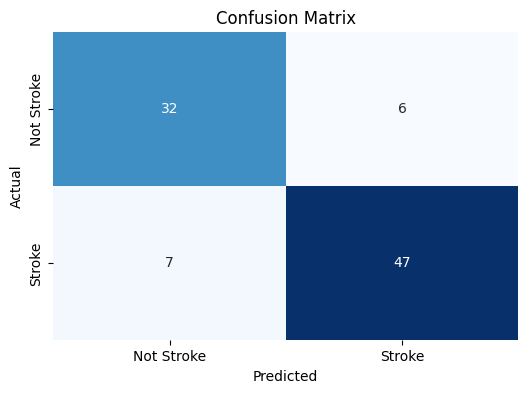


Classification Report:

              precision    recall  f1-score   support

  Not Stroke       0.82      0.84      0.83        38
      Stroke       0.89      0.87      0.88        54

    accuracy                           0.86        92
   macro avg       0.85      0.86      0.85        92
weighted avg       0.86      0.86      0.86        92

ROC-AUC: 0.9039961013645225


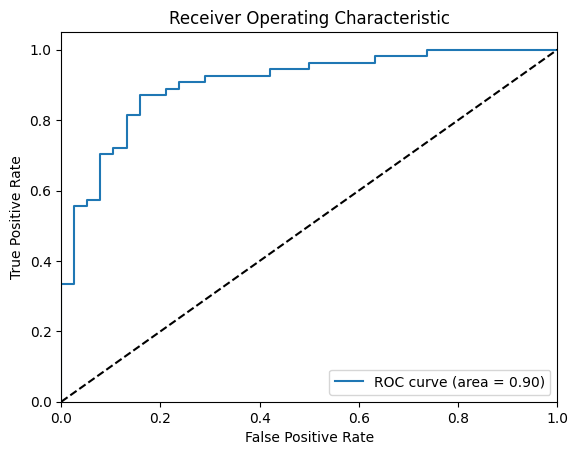

PR AUC: 0.9314099641842626


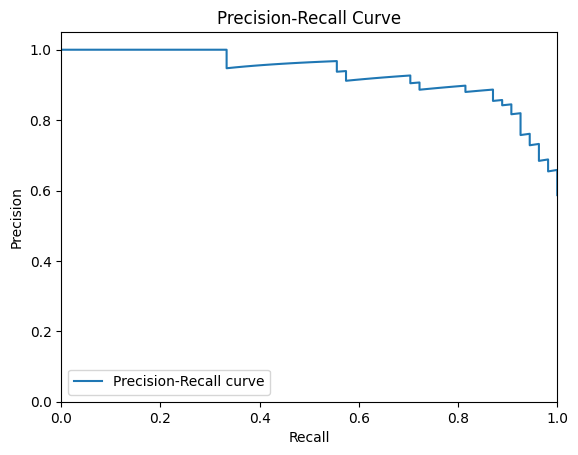

  8%|██████▍                                                                            | 1/13 [00:00<00:06,  1.83it/s]


Confusion Matrix:
 [[30  8]
 [ 9 45]]


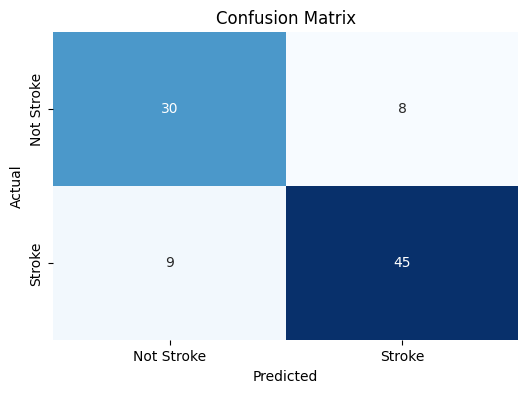


Classification Report:

              precision    recall  f1-score   support

  Not Stroke       0.77      0.79      0.78        38
      Stroke       0.85      0.83      0.84        54

    accuracy                           0.82        92
   macro avg       0.81      0.81      0.81        92
weighted avg       0.82      0.82      0.82        92

ROC-AUC: 0.8993664717348928


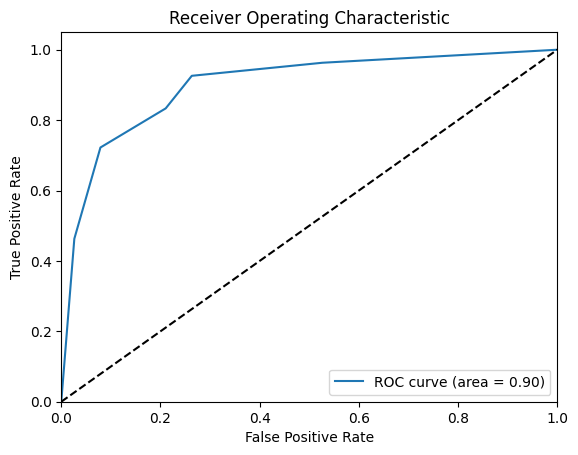

PR AUC: 0.9058856539943041


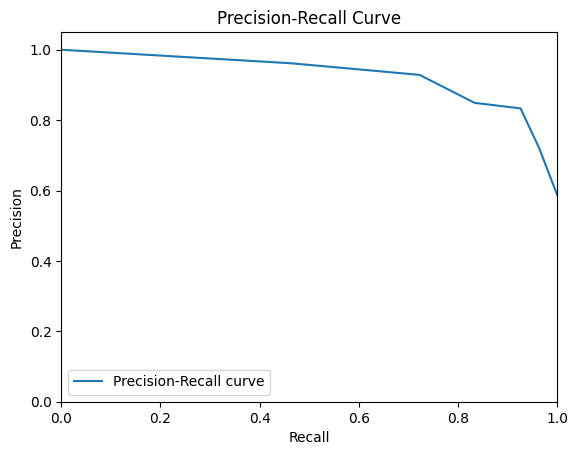

 15%|████████████▊                                                                      | 2/13 [00:00<00:05,  2.20it/s]


Confusion Matrix:
 [[30  8]
 [ 7 47]]


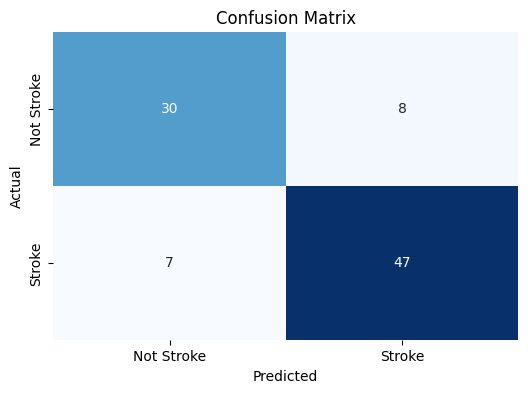


Classification Report:

              precision    recall  f1-score   support

  Not Stroke       0.81      0.79      0.80        38
      Stroke       0.85      0.87      0.86        54

    accuracy                           0.84        92
   macro avg       0.83      0.83      0.83        92
weighted avg       0.84      0.84      0.84        92

ROC-AUC: 0.9463937621832359


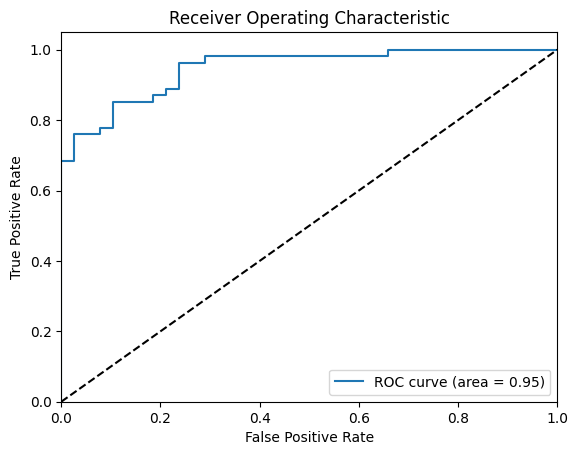

PR AUC: 0.965524943178458


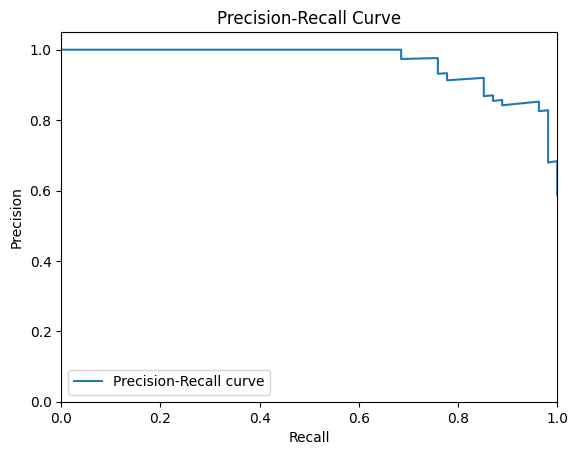

 23%|███████████████████▏                                                               | 3/13 [00:01<00:07,  1.40it/s]


Confusion Matrix:
 [[30  8]
 [11 43]]


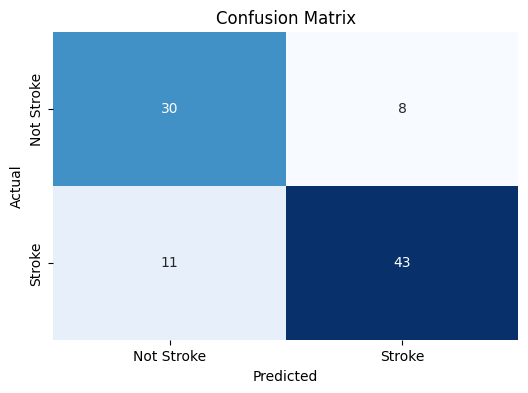


Classification Report:

              precision    recall  f1-score   support

  Not Stroke       0.73      0.79      0.76        38
      Stroke       0.84      0.80      0.82        54

    accuracy                           0.79        92
   macro avg       0.79      0.79      0.79        92
weighted avg       0.80      0.79      0.79        92

ROC-AUC: 0.7928849902534114


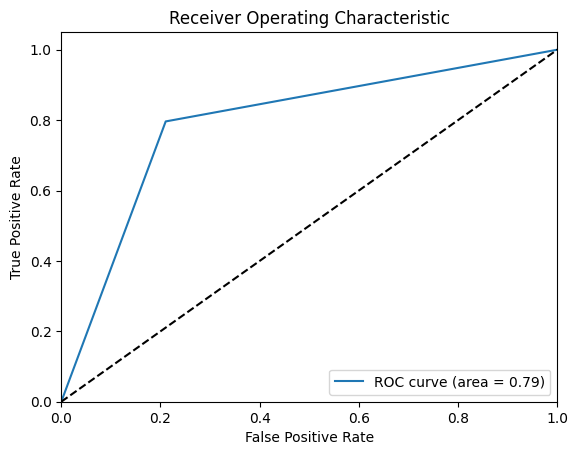

PR AUC: 0.790952290739162


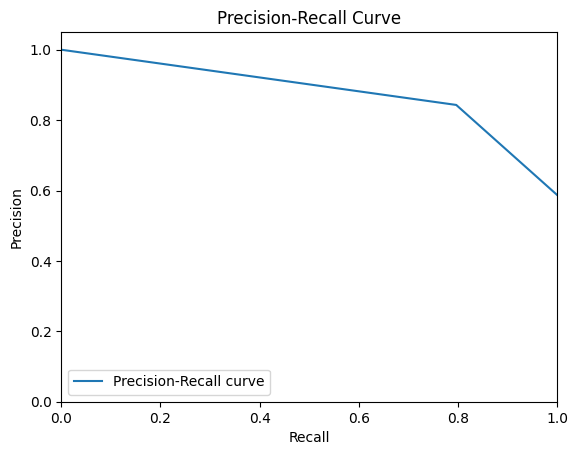

 31%|█████████████████████████▌                                                         | 4/13 [00:03<00:07,  1.14it/s]


Confusion Matrix:
 [[31  7]
 [ 7 47]]


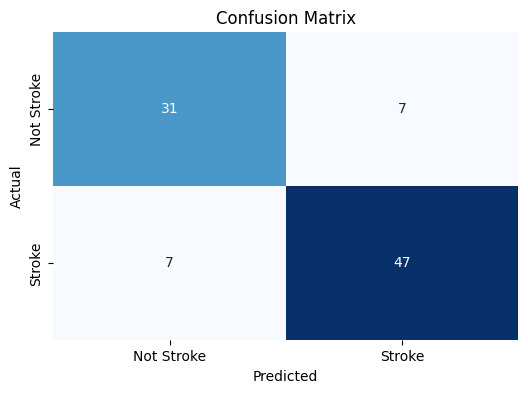


Classification Report:

              precision    recall  f1-score   support

  Not Stroke       0.82      0.82      0.82        38
      Stroke       0.87      0.87      0.87        54

    accuracy                           0.85        92
   macro avg       0.84      0.84      0.84        92
weighted avg       0.85      0.85      0.85        92

ROC-AUC: 0.9137426900584795


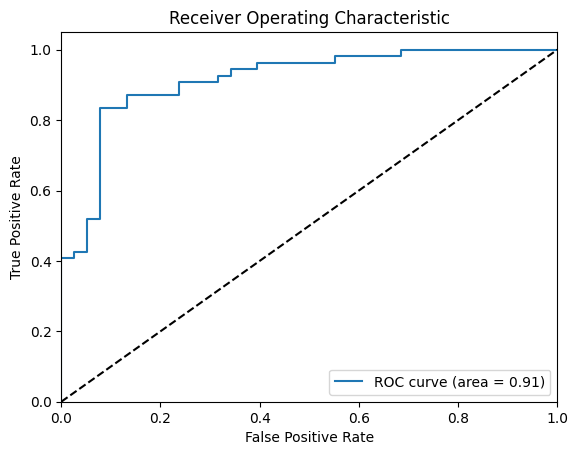

PR AUC: 0.9364633612545545


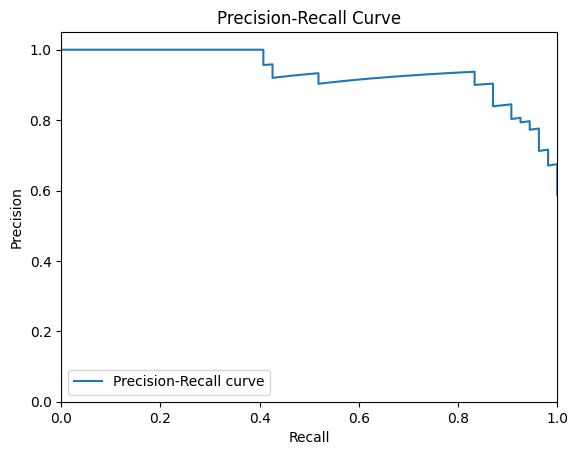

 38%|███████████████████████████████▉                                                   | 5/13 [00:03<00:06,  1.33it/s]


Confusion Matrix:
 [[33  5]
 [ 5 49]]


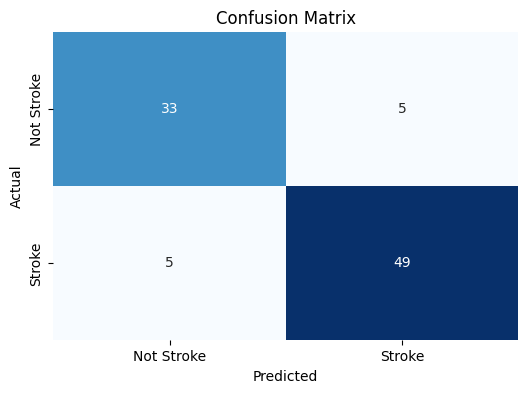


Classification Report:

              precision    recall  f1-score   support

  Not Stroke       0.87      0.87      0.87        38
      Stroke       0.91      0.91      0.91        54

    accuracy                           0.89        92
   macro avg       0.89      0.89      0.89        92
weighted avg       0.89      0.89      0.89        92

ROC-AUC: 0.9329922027290447


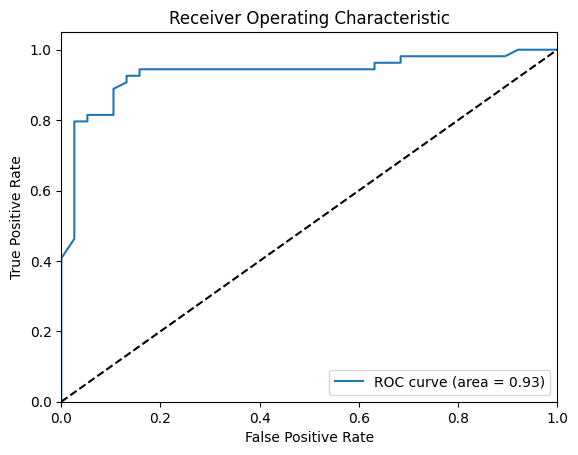

PR AUC: 0.9571784089407085


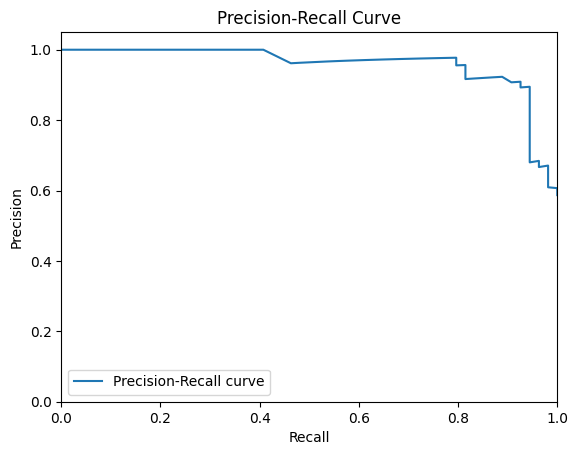

 46%|██████████████████████████████████████▎                                            | 6/13 [00:04<00:05,  1.19it/s]


Confusion Matrix:
 [[35  3]
 [ 8 46]]


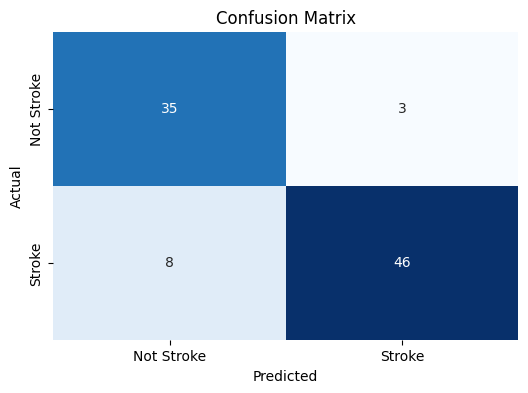


Classification Report:

              precision    recall  f1-score   support

  Not Stroke       0.81      0.92      0.86        38
      Stroke       0.94      0.85      0.89        54

    accuracy                           0.88        92
   macro avg       0.88      0.89      0.88        92
weighted avg       0.89      0.88      0.88        92

ROC-AUC: 0.9381091617933722


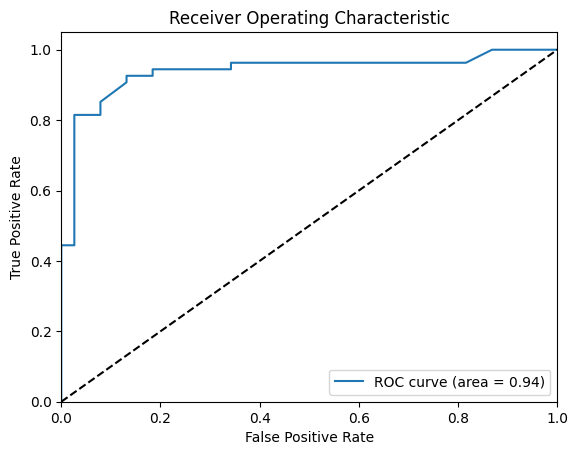

PR AUC: 0.9602905413860592


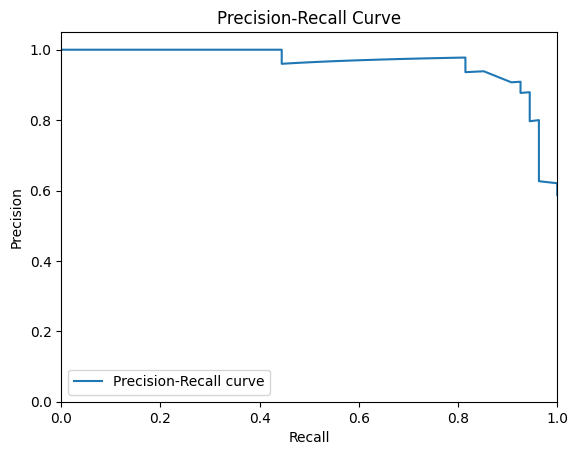

 54%|████████████████████████████████████████████▋                                      | 7/13 [00:05<00:05,  1.19it/s]


Confusion Matrix:
 [[32  6]
 [ 7 47]]


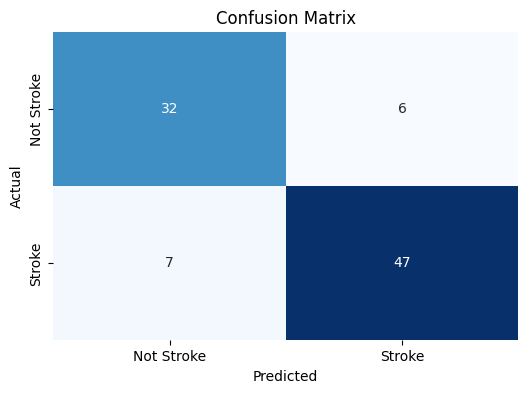


Classification Report:

              precision    recall  f1-score   support

  Not Stroke       0.82      0.84      0.83        38
      Stroke       0.89      0.87      0.88        54

    accuracy                           0.86        92
   macro avg       0.85      0.86      0.85        92
weighted avg       0.86      0.86      0.86        92

ROC-AUC: 0.9176413255360624


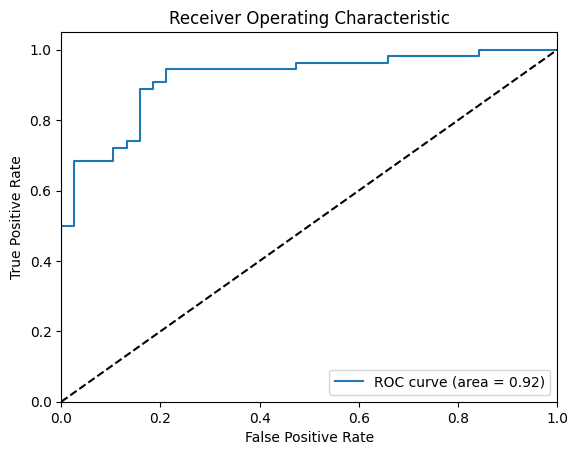

PR AUC: 0.9463456057653845


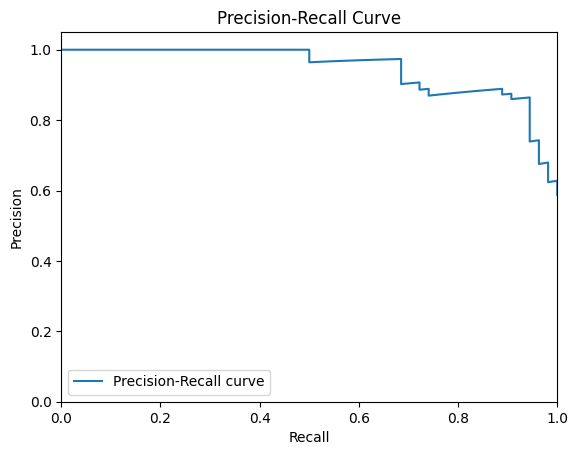

 62%|███████████████████████████████████████████████████                                | 8/13 [00:06<00:04,  1.22it/s]


Confusion Matrix:
 [[31  7]
 [ 5 49]]


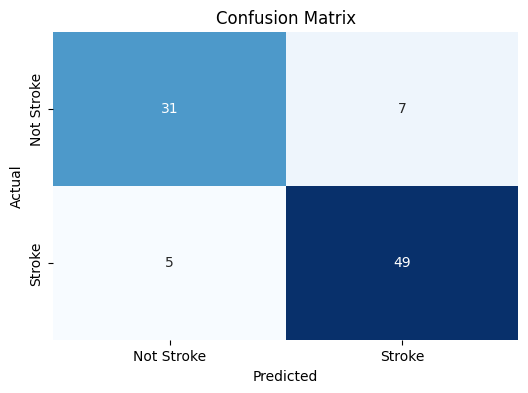


Classification Report:

              precision    recall  f1-score   support

  Not Stroke       0.86      0.82      0.84        38
      Stroke       0.88      0.91      0.89        54

    accuracy                           0.87        92
   macro avg       0.87      0.86      0.86        92
weighted avg       0.87      0.87      0.87        92

ROC-AUC: 0.9278752436647173


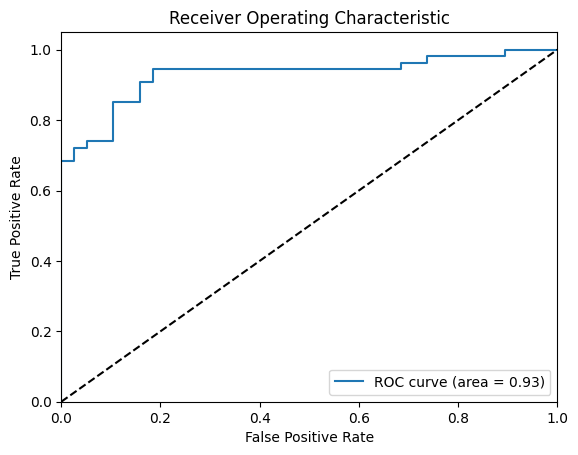

PR AUC: 0.9583988874927383


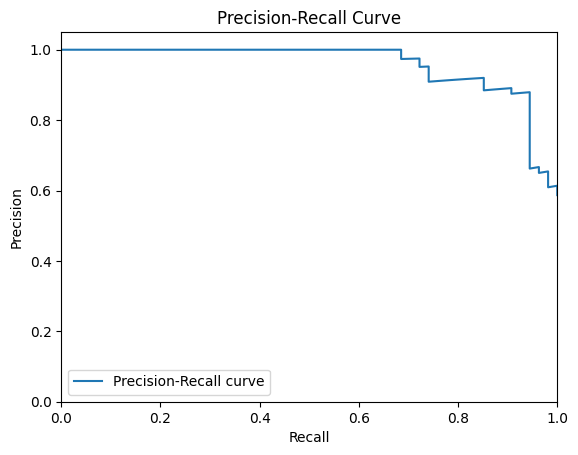

 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [00:07<00:03,  1.16it/s]


Confusion Matrix:
 [[32  6]
 [ 6 48]]


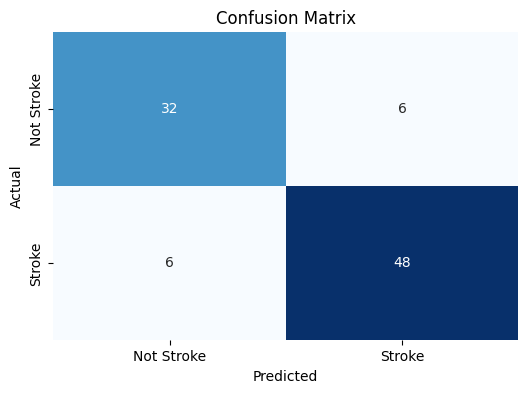


Classification Report:

              precision    recall  f1-score   support

  Not Stroke       0.84      0.84      0.84        38
      Stroke       0.89      0.89      0.89        54

    accuracy                           0.87        92
   macro avg       0.87      0.87      0.87        92
weighted avg       0.87      0.87      0.87        92

ROC-AUC: 0.9356725146198831


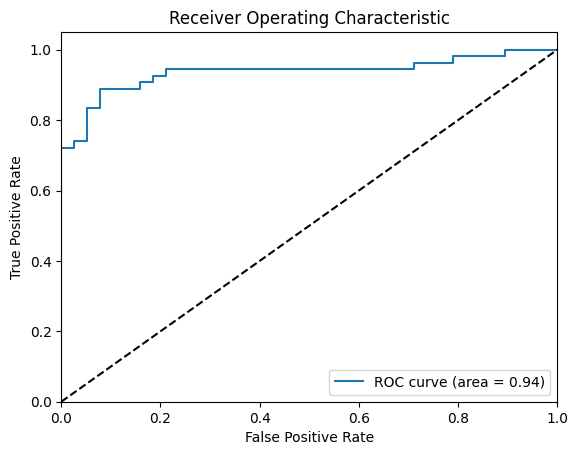

PR AUC: 0.9651119805251172


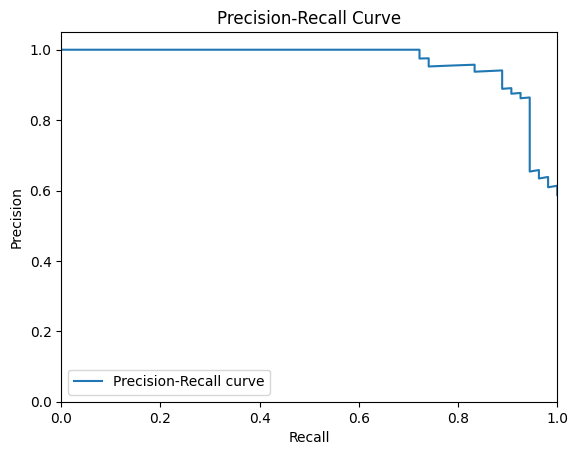

 77%|███████████████████████████████████████████████████████████████                   | 10/13 [00:08<00:02,  1.10it/s]


Confusion Matrix:
 [[32  6]
 [ 9 45]]


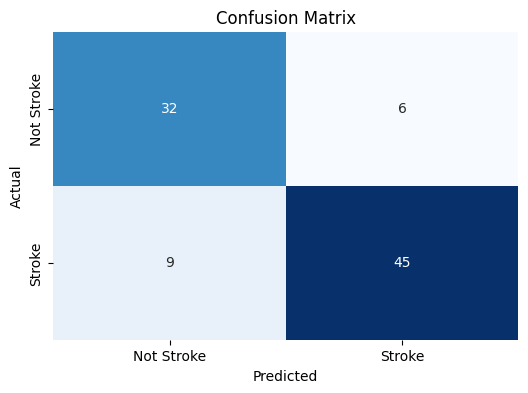


Classification Report:

              precision    recall  f1-score   support

  Not Stroke       0.78      0.84      0.81        38
      Stroke       0.88      0.83      0.86        54

    accuracy                           0.84        92
   macro avg       0.83      0.84      0.83        92
weighted avg       0.84      0.84      0.84        92

ROC-AUC: 0.9269005847953217


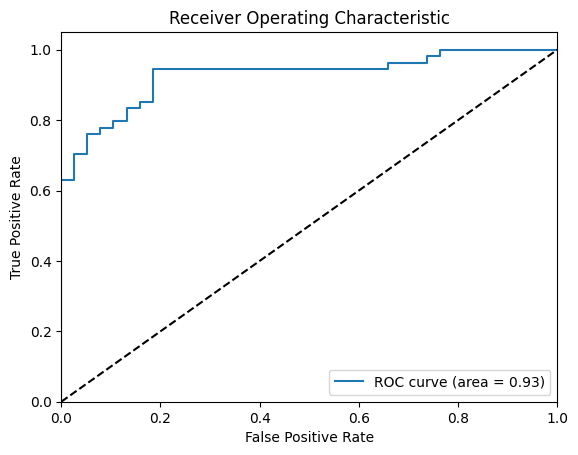

PR AUC: 0.9562218107109623


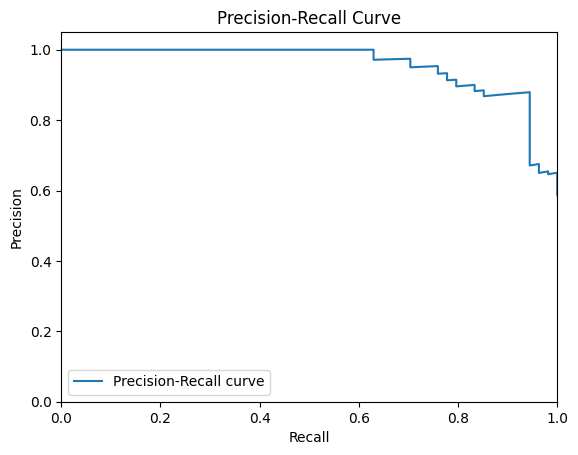

 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [00:08<00:01,  1.17it/s]


Confusion Matrix:
 [[34  4]
 [ 4 50]]


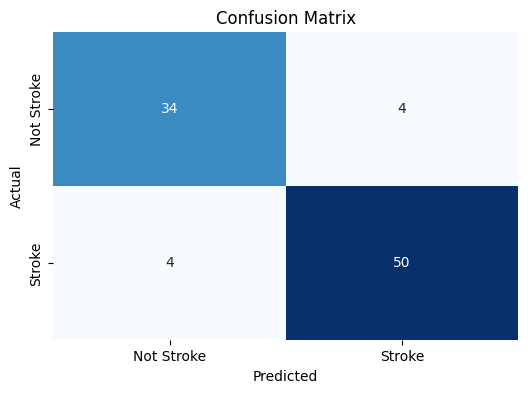


Classification Report:

              precision    recall  f1-score   support

  Not Stroke       0.89      0.89      0.89        38
      Stroke       0.93      0.93      0.93        54

    accuracy                           0.91        92
   macro avg       0.91      0.91      0.91        92
weighted avg       0.91      0.91      0.91        92

ROC-AUC: 0.9424951267056529


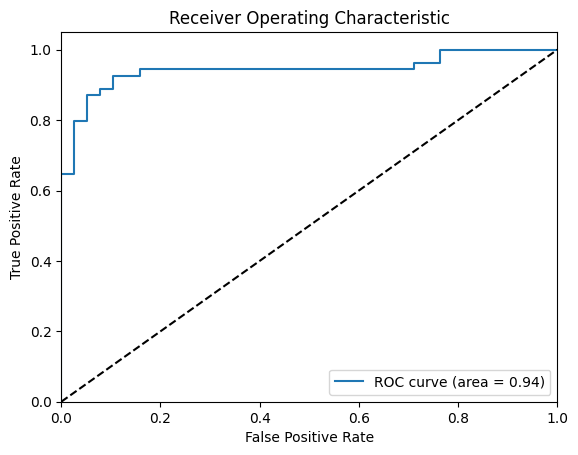

PR AUC: 0.9680529281401851


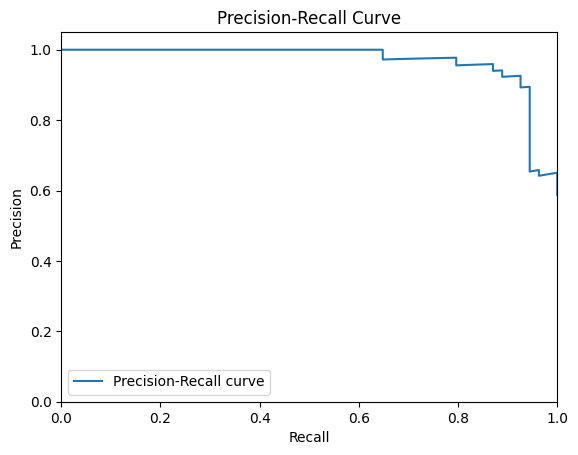

 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [00:13<00:01,  1.95s/it]

[LightGBM] [Info] Number of positive: 454, number of negative: 372
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 378
[LightGBM] [Info] Number of data points in the train set: 826, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549637 -> initscore=0.199203
[LightGBM] [Info] Start training from score 0.199203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf



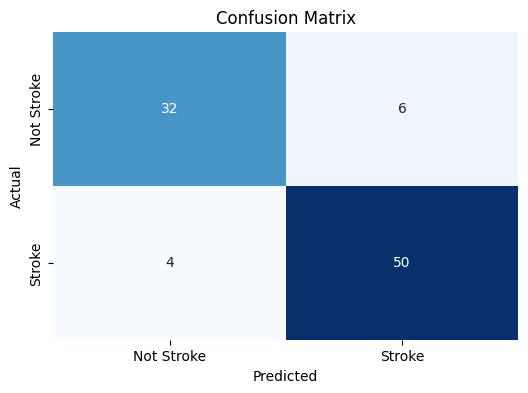


Classification Report:

              precision    recall  f1-score   support

  Not Stroke       0.89      0.84      0.86        38
      Stroke       0.89      0.93      0.91        54

    accuracy                           0.89        92
   macro avg       0.89      0.88      0.89        92
weighted avg       0.89      0.89      0.89        92

ROC-AUC: 0.9410331384015594


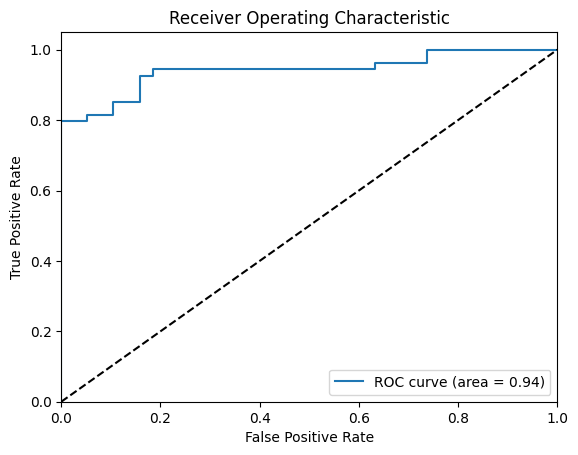

PR AUC: 0.9672354649207049


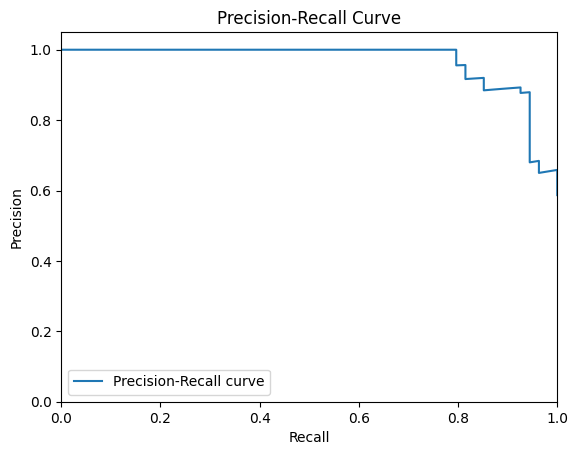

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:14<00:00,  1.09s/it]


In [214]:
results = {}
from tqdm import tqdm

for name, model in tqdm(models.items()):
    model.fit(x_train, y_train)

    train_pred = model.predict(x_train)
    test_pred  = model.predict(x_test)

    results[name] = {
        "Train Accuracy": accuracy_score(y_train, train_pred),
        "Test Accuracy": accuracy_score(y_test, test_pred),
        "Train Precision": precision_score(y_train, train_pred),
        "Test Precision": precision_score(y_test, test_pred),
        "Train Recall": recall_score(y_train, train_pred),
        "Test Recall": recall_score(y_test, test_pred),
        "Train F1 Score": f1_score(y_train, train_pred),
        "Test F1 Score": f1_score(y_test, test_pred),
        "Train Balanced Accuracy": balanced_accuracy_score(y_train, train_pred),
        "Test Balanced Accuracy": balanced_accuracy_score(y_test, test_pred)
    }

    cm = confusion_matrix(y_test, test_pred)
    print("\nConfusion Matrix:\n", cm)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm,annot=True,fmt="d",cmap='Blues',cbar=False,
                xticklabels=['Not Stroke','Stroke'],
                yticklabels=['Not Stroke','Stroke'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    # Full classification report
    print("\nClassification Report:\n")
    print(classification_report(y_test, test_pred, target_names=['Not Stroke','Stroke'], zero_division=0))

    y_pred_prob = model.predict_proba(x_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print("ROC-AUC:", roc_auc)

    # ROC curve
    fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall curve
    pr_auc = average_precision_score(y_test, y_pred_prob)
    print("PR AUC:", pr_auc)

    precision_vals, recall_vals, pr_thresholds = precision_recall_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(recall_vals, precision_vals, label='Precision-Recall curve')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()


In [215]:
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="Test F1 Score", ascending=False)

In [216]:
results_df


,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score,Train Balanced Accuracy,Test Balanced Accuracy
CatBoost,0.974576,0.913043,0.967603,0.925926,0.986784,0.925926,0.977099,0.925926,0.973231,0.910331
LightGBM,1.000000,0.891304,1.000000,0.892857,1.000000,0.925926,1.000000,0.909091,1.000000,0.884016
Random Forest,1.000000,0.891304,1.000000,0.907407,1.000000,0.907407,1.000000,0.907407,1.000000,0.887914
Extra Trees,1.000000,0.880435,1.000000,0.938776,1.000000,0.851852,1.000000,0.893204,1.000000,0.886452
Gradient Boosting,0.940678,0.869565,0.941176,0.875000,0.951542,0.907407,0.946331,0.890909,0.939481,0.861598
Hist Gradient Boosting,1.000000,0.869565,1.000000,0.888889,1.000000,0.888889,1.000000,0.888889,1.000000,0.865497
Logistic Regression,0.859564,0.858696,0.867391,0.886792,0.878855,0.870370,0.873085,0.878505,0.857438,0.856238
AdaBoost,0.875303,0.858696,0.880694,0.886792,0.894273,0.870370,0.887432,0.878505,0.873212,0.856238
Naive Bayes,0.859564,0.847826,0.873894,0.870370,0.870044,0.870370,0.871965,0.870370,0.858409,0.843080
SVC,0.889831,0.836957,0.877339,0.854545,0.929515,0.870370,0.902674,0.862385,0.885457,0.829922


<Axes: >

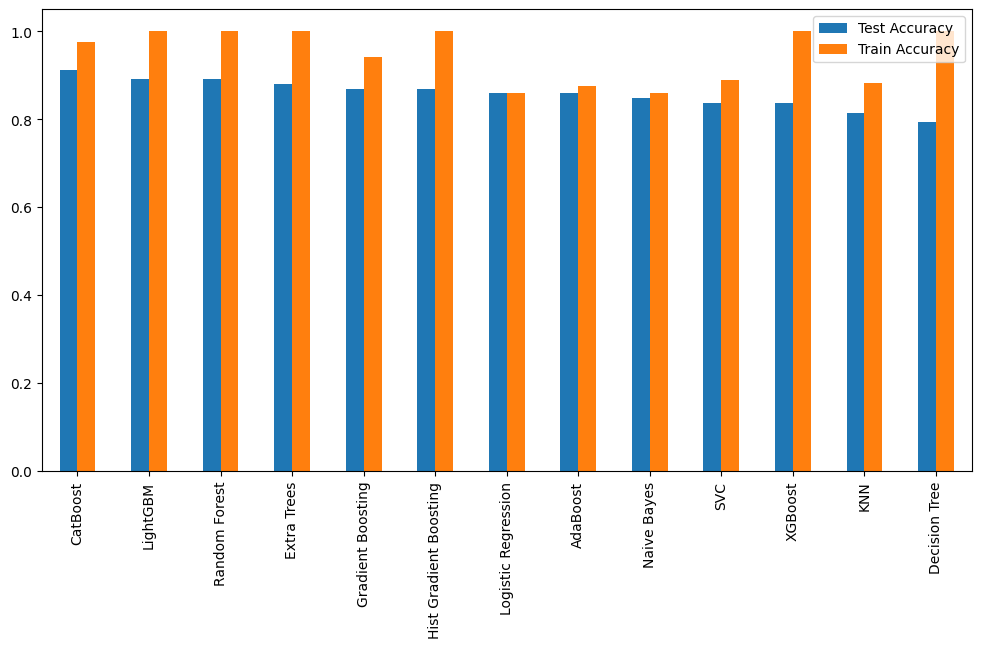

In [217]:
results_df[["Test Accuracy", "Train Accuracy"]].plot.bar(figsize=(12,6))

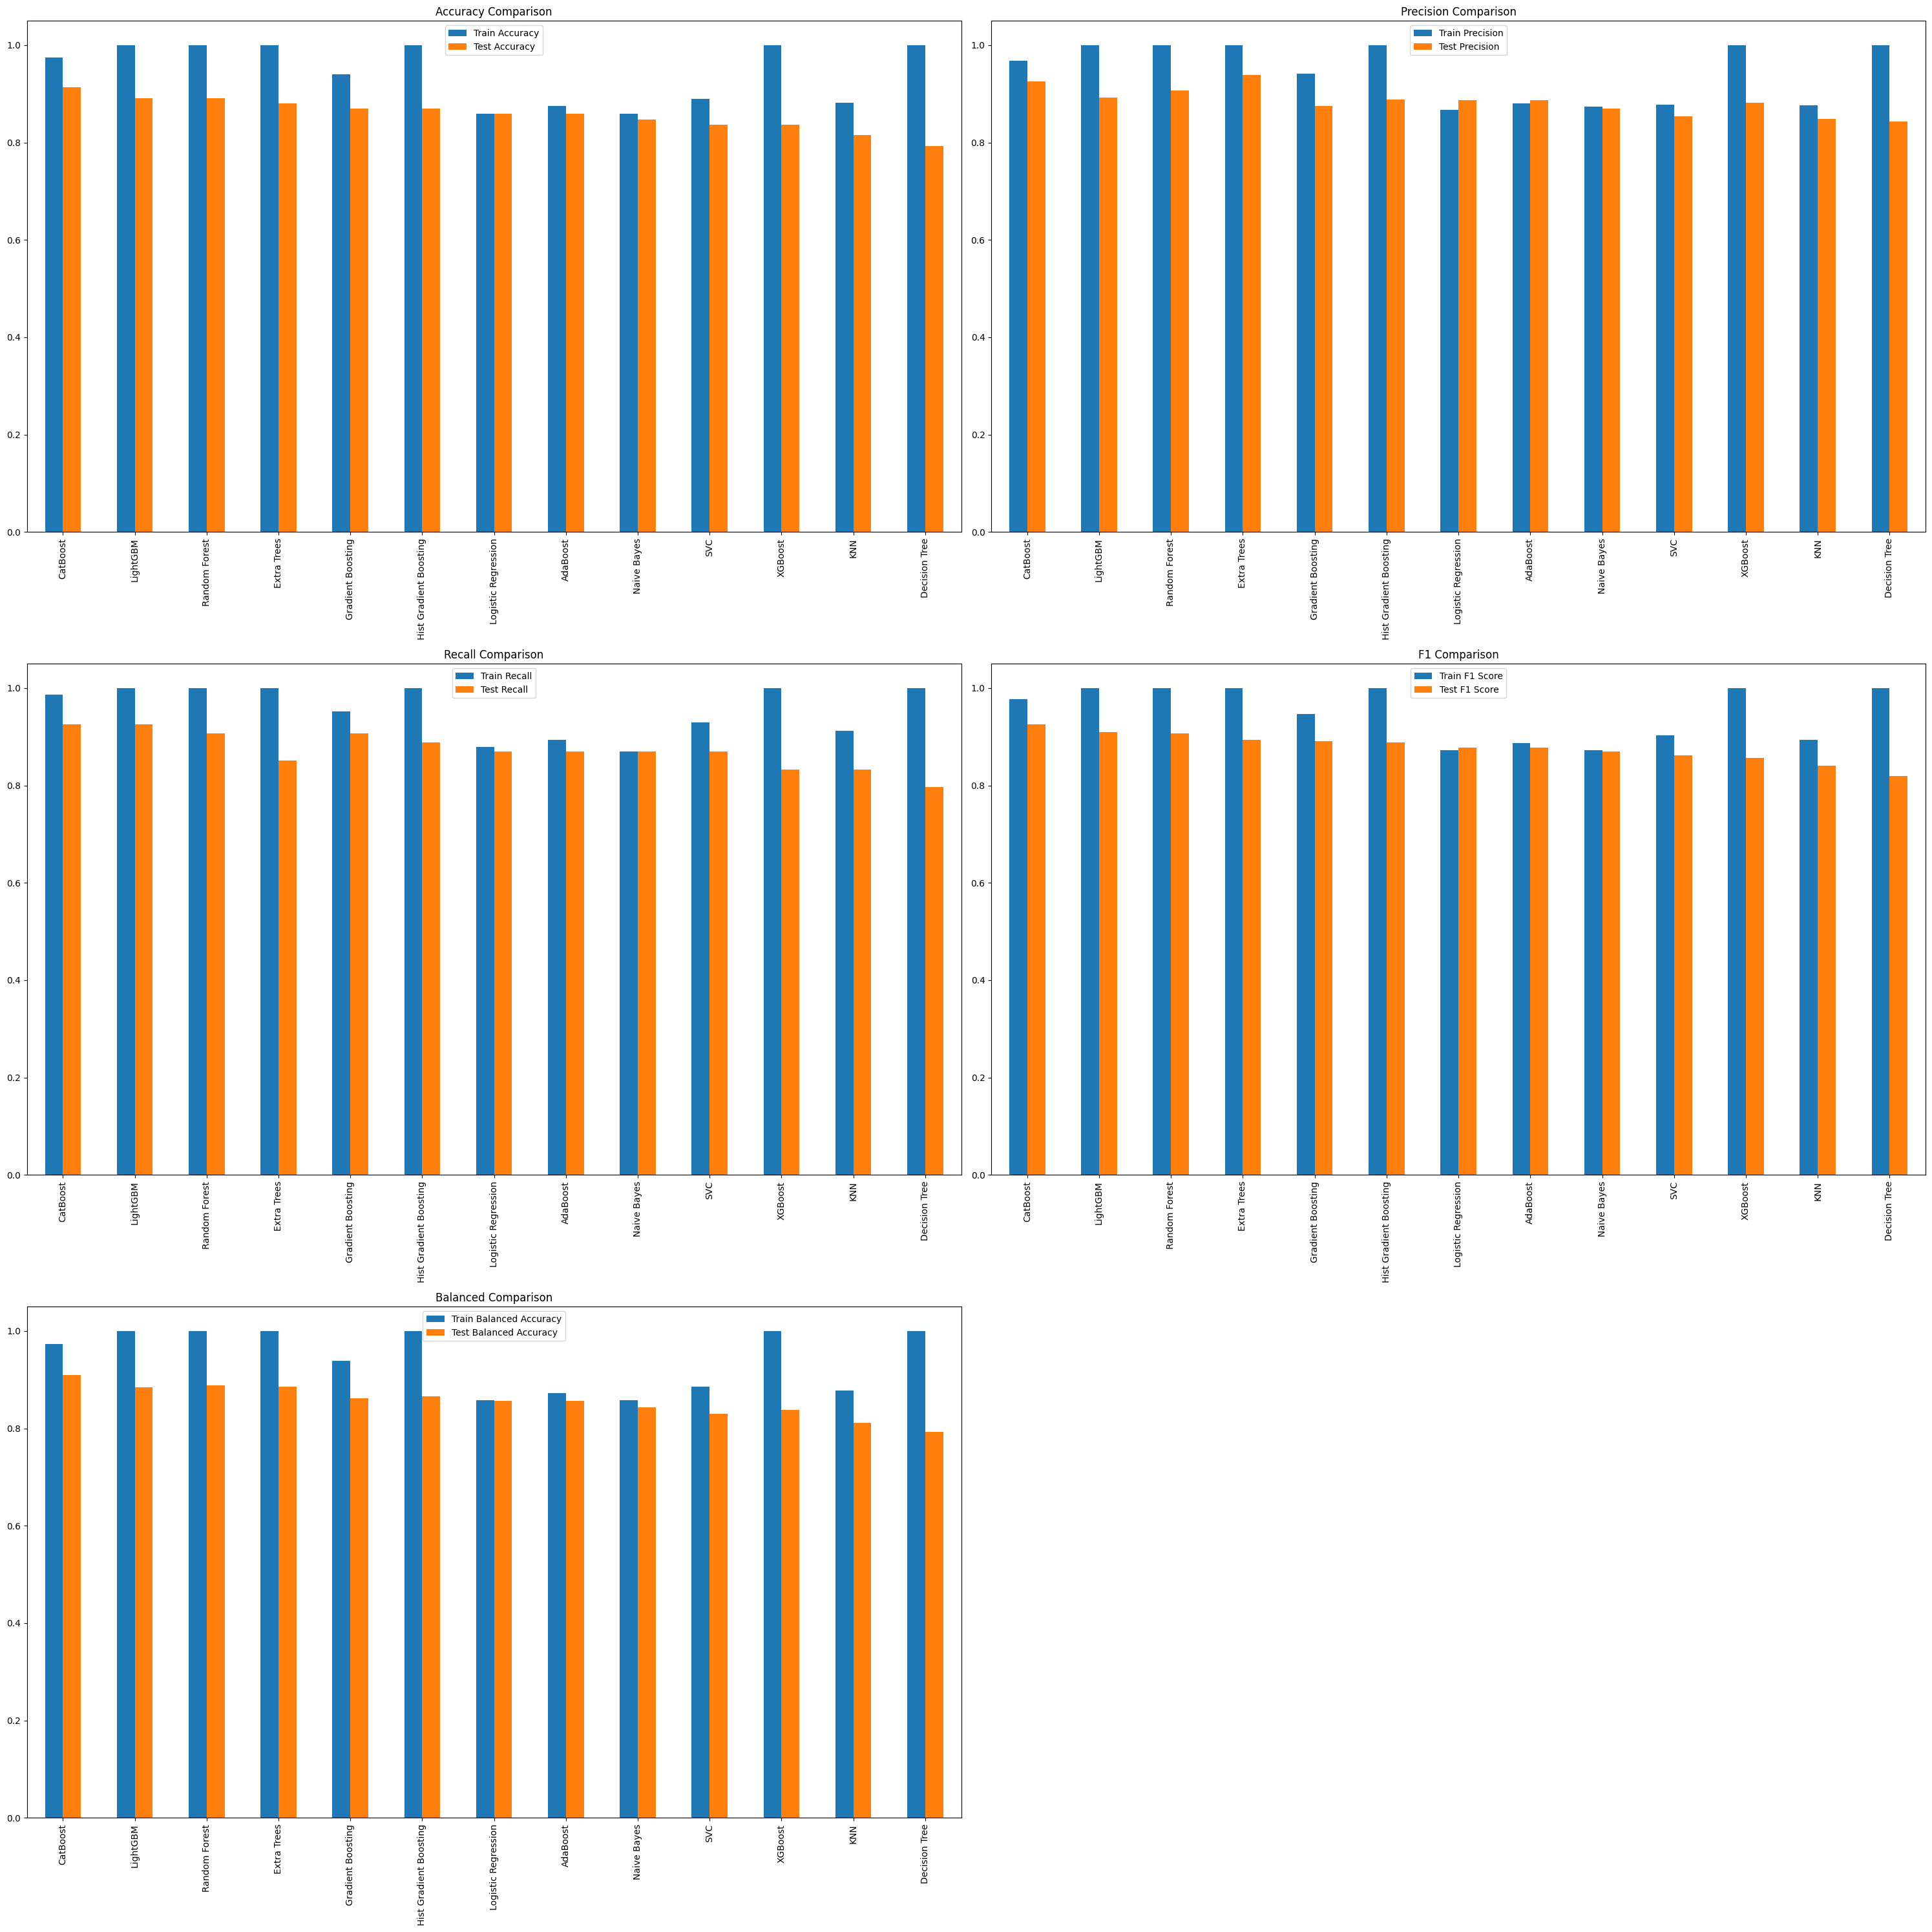

In [218]:
cols = [
    ['Train Accuracy', 'Test Accuracy'],
    ['Train Precision', 'Test Precision'],
    ['Train Recall', 'Test Recall'],
    ['Train F1 Score', 'Test F1 Score'],
    ["Train Balanced Accuracy", "Test Balanced Accuracy"]
]

plt.figure(figsize=(30,30))

for i, col in enumerate(cols):
    ax = plt.subplot(3, 2, i+1)   
    results_df[col].plot.bar(ax=ax)   
    ax.set_title(col[0].split(" ")[1] + ' Comparison')

plt.tight_layout()
plt.show()

------
pipline
---

In [147]:
# ====================================
# Heart Disease Prediction - Training
# ====================================

import pandas as pd
import pickle as pk

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# ==============================
# 1️⃣ Load Data
# ==============================

df = pd.read_csv(r"D:\00jupters-notebook\Task_Nti\Data\heart.csv")

# ==============================
# 2️⃣ Split
# ==============================

X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ==============================
# 3️⃣ Column Groups
# ==============================

num_cols = [
    'Age',
    'RestingBP',
    'Cholesterol',
    'MaxHR',
    'Oldpeak'
]

cat_cols = [
    'Sex',
    'ChestPainType',
    'FastingBS',
    'RestingECG',
    'ExerciseAngina',
    'ST_Slope'
]

# ==============================
# 4️⃣ Preprocessing
# ==============================

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)

# ==============================
# 5️⃣ Pipeline
# ==============================

pipeline = Pipeline(steps=[
    ('prep', preprocessor),
    ('model', HistGradientBoostingClassifier(random_state=42))
])

# ==============================
# 6️⃣ Train
# ==============================

pipeline.fit(X_train, y_train)

# ==============================
# 7️⃣ Evaluate
# ==============================

y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ==============================
# 8️⃣ Save Model
# ==============================

pk.dump(pipeline, open("heart_pipeline.pkl", "wb"))

print("\n✅ Model saved as heart_pipeline.pkl")


Accuracy: 0.8804347826086957

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        82
           1       0.91      0.87      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184


✅ Model saved as heart_pipeline.pkl


**Created by:** Mohamed Ayman  